In [1]:
#se importan librerias
import pandas as pd
import numpy as np
from datetime import datetime as dt
from datetime import timedelta as delta
from matplotlib import pyplot as plt
from matplotlib import dates as mpd

In [2]:
#lectura de archivo y asignación de variable para el data frame.
#Se le asigna engine para evitar errores de lectura por formato.
df = pd.read_csv("200511COVID19MEXICO.csv", engine="python") 

In [3]:
#se crea variable de df1 para dataframe de sonora
df1 = df[(df["ENTIDAD_UM"]==26)]

In [4]:
#se localizan las columnas dentro del data frame y se filtran
df1 = df1.loc[:,["FECHA_INGRESO","FECHA_SINTOMAS","FECHA_DEF"]]

In [5]:
#se organizan las columnas del data frame por fecha de defuncion, sintomas y de ingreso.
df1 = df1.sort_values(["FECHA_DEF","FECHA_SINTOMAS","FECHA_INGRESO"])

In [6]:
#exporta tabla del data frame correspondiente a Sonora (df1)
# df1.to_csv("tabla1.csv")
df1

,FECHA_INGRESO,FECHA_SINTOMAS,FECHA_DEF
54867,2020-03-18,2020-03-11,2020-03-18
38049,2020-03-27,2020-03-27,2020-03-29
75296,2020-03-23,2020-03-20,2020-03-30
18958,2020-03-24,2020-03-24,2020-03-30
80028,2020-03-27,2020-03-27,2020-03-31
...,...,...,...
133346,2020-05-10,2020-05-09,9999-99-99
126203,2020-05-11,2020-05-09,9999-99-99
133792,2020-05-11,2020-05-09,9999-99-99
134901,2020-05-11,2020-05-09,9999-99-99


In [7]:
#se seleccionan estados a evaluar y tipo de atención
#se reemplazan valores numericos por hilos acorde a abreviatura del estado
df2 = df[(df["TIPO_PACIENTE"]==2)]
df2 = df2.loc[:,["ENTIDAD_UM"]]
df2["ENTIDAD_UM"] = df2["ENTIDAD_UM"].map({26:"SR", 8:"CH", 19:"NL", 21:"PL"})
df2 = df2["ENTIDAD_UM"].value_counts().reset_index()

In [8]:
#exporta tabla del data frame correspondiente a numero de casos en estados
#df2.to_csv("tabla2.csv")
df2

,index,ENTIDAD_UM
0,PL,1301
1,NL,1089
2,CH,1013
3,SR,549


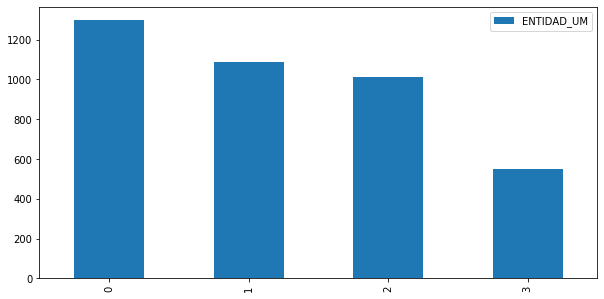

In [9]:
#creación de barra horizontal y .png
g1 = df2.plot.bar(figsize=(10, 5))
#g1.figure.savefig("grafica1.png")

In [10]:
#Agrupación de registros por día
df3 = df.groupby("FECHA_INGRESO")["ID_REGISTRO"].nunique().reset_index()

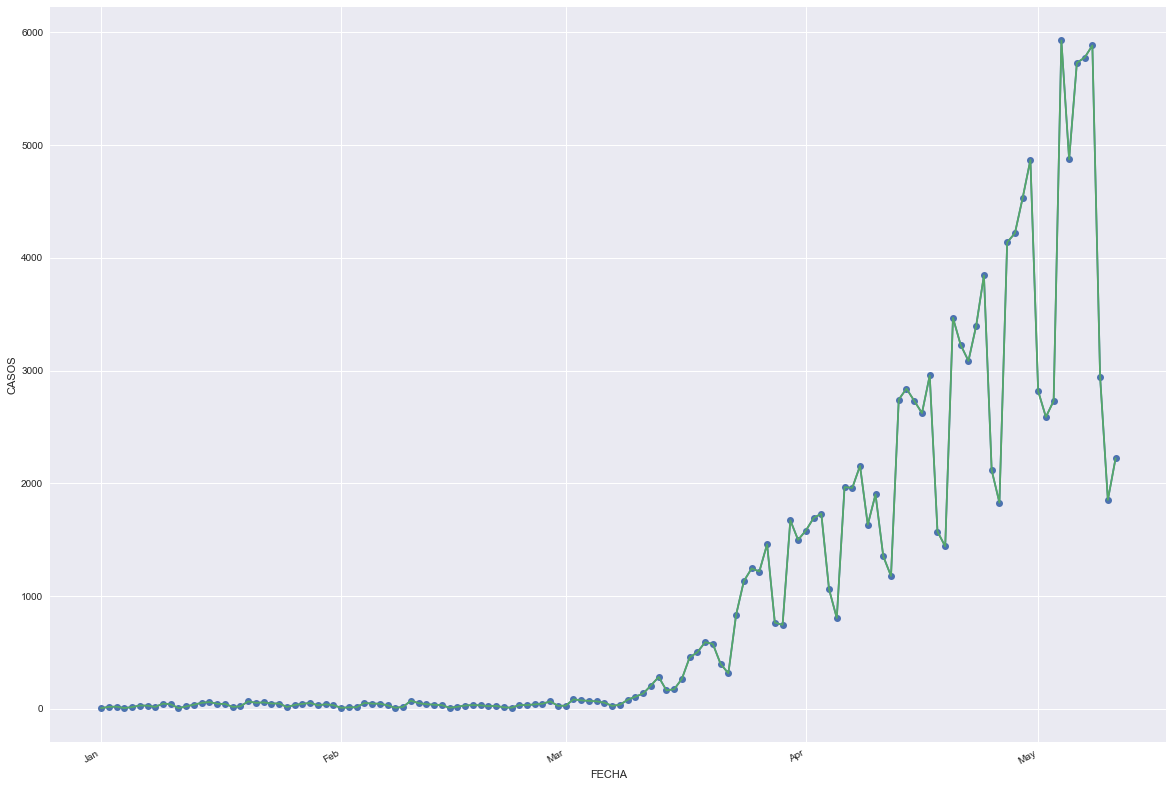

AttributeError: 'NoneType' object has no attribute 'plt'

In [39]:
#Asignación de estilo de ploteo
df3["FECHA_INGRESO"] = pd.to_datetime(df3["FECHA_INGRESO"])
df3.sort_values("FECHA_INGRESO", inplace=True)
plt.style.use("seaborn")
plt.plot_date(df3["FECHA_INGRESO"] ,df3["ID_REGISTRO"], linestyle="solid")
plt.gcf().autofmt_xdate()
plt.xlabel("FECHA")
plt.ylabel("CASOS")
locator = mpd.MonthLocator()
fmt = mpd.DateFormatter('%b')
plt.plot(df3["FECHA_INGRESO"], df3["ID_REGISTRO"])
X = plt.gca().xaxis
X.set_major_locator(locator)
X.set_major_formatter(fmt)
plt.gcf().set_size_inches(20, 15)
plt.show()
fig.savefig(grafico2.png)